In [1]:
from pathlib import Path
import os
import gc
import pandas as pd
import numpy as np
from collections import Counter

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import cv2
import imageio
import subprocess
from PIL import Image
#import ffmpeg

from IPython.display import Video, display
import os
import pickle


sns.set_style("whitegrid")
colorpal = sns.color_palette("husl", 9)

import warnings
warnings.filterwarnings("ignore")
data_path = Path("input")
%matplotlib inline
plt.rcParams['figure.dpi'] = 150


In [2]:

#set paths
paths = {
    "image_path": "images",
    "train_videos": "train",
    "test_videos": "test",
    "image_labels": "image_labels.csv",
    "train_labels": "train_labels.csv",
    "train_player_tracking": "train_player_tracking.csv",
    "test_player_tracking": "test_player_tracking.csv",
    "sample_submissions": "sample_submission.csv",
    "data_merged": "trainingLabels_merged_impactedAligned.csv"

}
paths = {x: data_path / y for x, y in paths.items()}

In [3]:
trainingLabels = pd.read_csv(paths["data_merged"])
trainingLabels.head()


Unnamed: 0  gameKey  playID     view                     video  frame  \
0           0    57583      82  Endzone  57583_000082_Endzone.mp4      1   
1           1    57583      82  Endzone  57583_000082_Endzone.mp4      1   
2           2    57583      82  Endzone  57583_000082_Endzone.mp4      1   
3           3    57583      82  Endzone  57583_000082_Endzone.mp4      1   
4           4    57583      82  Endzone  57583_000082_Endzone.mp4      1   

  label  left  width  top  ...  confidence  visibility   x   y   s   a  dis  \
0   H30   629     19   40  ...         NaN         NaN NaN NaN NaN NaN  NaN   
1   V72   443     22  344  ...         NaN         NaN NaN NaN NaN NaN  NaN   
2   V86   871     21  359  ...         NaN         NaN NaN NaN NaN NaN  NaN   
3   V74   771     19  345  ...         NaN         NaN NaN NaN NaN NaN  NaN   
4   V34   549     26  461  ...         NaN         NaN NaN NaN NaN NaN  NaN   

    o  dir  event  
0 NaN  NaN    NaN  
1 NaN  NaN    NaN  
2 NaN  NaN    NaN  
3 NaN  NaN    NaN  
4 NaN  NaN    NaN  

[5 rows x 23 columns]

In [4]:
trainingLabels = trainingLabels[trainingLabels.view != 'Sideline']


In [5]:
trainingLabels = trainingLabels[trainingLabels.x.notnull()]


In [6]:
trainingLabels.sort_values(by=['impact', 'frame'])


Unnamed: 0  gameKey  playID     view                     video  frame  \
659079      659079    57992     301  Endzone  57992_000301_Endzone.mp4     29   
659089      659089    57992     301  Endzone  57992_000301_Endzone.mp4     29   
966199      966199    58107    4362  Endzone  58107_004362_Endzone.mp4     29   
966200      966200    58107    4362  Endzone  58107_004362_Endzone.mp4     29   
533160      533160    57906     718  Endzone  57906_000718_Endzone.mp4     30   
...            ...      ...     ...      ...                       ...    ...   
30040        30040    57584     336  Endzone  57584_000336_Endzone.mp4    604   
30067        30067    57584     336  Endzone  57584_000336_Endzone.mp4    610   
30068        30068    57584     336  Endzone  57584_000336_Endzone.mp4    610   
30069        30069    57584     336  Endzone  57584_000336_Endzone.mp4    610   
30070        30070    57584     336  Endzone  57584_000336_Endzone.mp4    610   

       label  left  width  top  ...  confidence  visibility       x      y  \
659079   V99   575      9  389  ...         3.0         2.0    9.52  30.45   
659089   H65   569     15  379  ...         3.0         2.0   10.87  30.99   
966199   V94   591     25  319  ...         1.0         2.0  101.81  29.48   
966200   H79   613     22  306  ...         1.0         2.0  100.71  28.89   
533160   V98   631     17  266  ...         2.0         3.0   15.34  30.91   
...      ...   ...    ...  ...  ...         ...         ...     ...    ...   
30040    V26   264     33  319  ...         NaN         NaN   83.61   2.95   
30067    H26   591     28  247  ...         NaN         NaN   43.93  24.09   
30068    H70    59     33  434  ...         NaN         NaN   79.38   5.65   
30069    V29   374     27  583  ...         NaN         NaN   74.71   2.83   
30070    V26   256     33  315  ...         NaN         NaN   83.68   3.14   

           s     a   dis       o     dir  event  
659079  0.08  0.21  0.01  165.14   78.14    NaN  
659089  0.78  1.29  0.07  263.50  213.47    NaN  
966199  1.11  0.34  0.11  216.85  293.94    NaN  
966200  1.39  0.83  0.13   92.91   15.11    NaN  
533160  0.21  1.04  0.02  287.68  242.89    NaN  
...      ...   ...   ...     ...     ...    ...  
30040   2.04  0.37  0.20   19.31   20.02    NaN  
30067   0.02  0.02  0.00  136.56  205.16    NaN  
30068   1.72  1.07  0.17   11.02   23.87    NaN  
30069   3.37  0.90  0.34   59.46   55.70    NaN  
30070   2.04  0.35  0.20   20.48   20.64    NaN  

[72519 rows x 23 columns]

In [7]:
trainingLabels[((trainingLabels["impact"] == 1.00))]

Unnamed: 0  gameKey  playID     view                     video  frame  \
746            746    57583      82  Endzone  57583_000082_Endzone.mp4     38   
754            754    57583      82  Endzone  57583_000082_Endzone.mp4     38   
967            967    57583      82  Endzone  57583_000082_Endzone.mp4     49   
969            969    57583      82  Endzone  57583_000082_Endzone.mp4     49   
1007          1007    57583      82  Endzone  57583_000082_Endzone.mp4     51   
...            ...      ...     ...      ...                       ...    ...   
971866      971866    58107    4362  Endzone  58107_004362_Endzone.mp4    328   
973095      973095    58107    4362  Endzone  58107_004362_Endzone.mp4    400   
973110      973110    58107    4362  Endzone  58107_004362_Endzone.mp4    401   
973112      973112    58107    4362  Endzone  58107_004362_Endzone.mp4    401   
973799      973799    58107    4362  Endzone  58107_004362_Endzone.mp4    438   

       label  left  width  top  ...  confidence  visibility       x      y  \
746      H99   582     21  311  ...         2.0         2.0   35.23  26.29   
754      V68   562     18  313  ...         2.0         2.0   34.30  26.79   
967      H97   425     15  311  ...         3.0         3.0   35.29  28.75   
969      V72   434     18  316  ...         3.0         3.0   33.85  28.19   
1007     V73   614     19  317  ...         3.0         3.0   34.00  25.57   
...      ...   ...    ...  ...  ...         ...         ...     ...    ...   
971866   H35   550     27  283  ...         2.0         2.0  105.62  33.82   
973095   V23   613      5  439  ...         2.0         1.0  103.42  34.13   
973110   V94   628     22  350  ...         1.0         2.0  102.94  34.11   
973112   V99   621     23  326  ...         1.0         2.0  103.83  33.87   
973799   H35   599     21  440  ...         2.0         2.0  103.73  33.95   

           s     a   dis       o     dir  event  
746     0.25  1.07  0.05  305.64  292.71    NaN  
754     0.14  0.79  0.03   91.68  136.27    NaN  
967     0.76  1.88  0.13  259.62  241.54    NaN  
969     0.55  1.16  0.05   63.73  110.69    NaN  
1007    0.76  1.47  0.12  106.81   50.09    NaN  
...      ...   ...   ...     ...     ...    ...  
971866  0.80  2.16  0.09  281.04  266.62    NaN  
973095  0.32  0.88  0.04  156.68  295.03    NaN  
973110  1.19  1.41  0.16   55.92  276.61    NaN  
973112  1.65  1.22  0.19  289.05  272.02    NaN  
973799  0.24  0.61  0.03  218.44  277.10    NaN  

[1182 rows x 23 columns]

In [8]:
del trainingLabels['Unnamed: 0']



In [9]:
trainingLabels

gameKey  playID     view                     video  frame label  left  \
180       57583      82  Endzone  57583_000082_Endzone.mp4     10   V73   664   
181       57583      82  Endzone  57583_000082_Endzone.mp4     10   H99   586   
182       57583      82  Endzone  57583_000082_Endzone.mp4     10   V15  1071   
183       57583      82  Endzone  57583_000082_Endzone.mp4     10   V87   960   
184       57583      82  Endzone  57583_000082_Endzone.mp4     10   V34   550   
...         ...     ...      ...                       ...    ...   ...   ...   
974437    58107    4362  Endzone  58107_004362_Endzone.mp4    472   H88   916   
974438    58107    4362  Endzone  58107_004362_Endzone.mp4    472   H77   766   
974439    58107    4362  Endzone  58107_004362_Endzone.mp4    472   V96   692   
974440    58107    4362  Endzone  58107_004362_Endzone.mp4    472   H62   696   
974441    58107    4362  Endzone  58107_004362_Endzone.mp4    472   V24   625   

        width  top  height  ...  confidence visibility       x      y     s  \
180        17  348      12  ...         NaN        NaN   33.74  25.36  0.00   
181        22  327      29  ...         NaN        NaN   35.32  26.25  0.00   
182        24  297      22  ...         NaN        NaN   33.86  19.80  0.00   
183        20  359      16  ...         NaN        NaN   32.98  21.35  0.00   
184        24  459      21  ...         NaN        NaN   27.24  26.68  0.00   
...       ...  ...     ...  ...         ...        ...     ...    ...   ...   
974437     28  311      26  ...         NaN        NaN  102.09  29.97  0.07   
974438     23  203      29  ...         NaN        NaN  107.76  31.99  1.13   
974439     25  245      29  ...         NaN        NaN  105.49  33.00  0.20   
974440     28  230      25  ...         NaN        NaN  106.57  32.89  0.93   
974441     25  189      27  ...         NaN        NaN  109.28  33.93  0.70   

           a   dis       o     dir      event  
180     0.00  0.00  120.32   47.44  ball_snap  
181     0.00  0.00  272.45  317.96  ball_snap  
182     0.00  0.00   85.04  342.84  ball_snap  
183     0.00  0.00   67.37  294.24  ball_snap  
184     0.00  0.00   65.35   21.50  ball_snap  
...      ...   ...     ...     ...        ...  
974437  0.23  0.01   61.49  342.98        NaN  
974438  0.28  0.12  263.56  253.63        NaN  
974439  0.16  0.02  294.73  352.81        NaN  
974440  0.53  0.09  199.06  243.83        NaN  
974441  0.55  0.07  215.22  182.61        NaN  

[72519 rows x 22 columns]

In [10]:
trainingLabels['Home']=trainingLabels['label'].str.contains('H')
trainingLabels['Home']=trainingLabels['Home']*1

In [11]:
trainingLabels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72519 entries, 180 to 974441
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gameKey     72519 non-null  int64  
 1   playID      72519 non-null  int64  
 2   view        72519 non-null  object 
 3   video       72519 non-null  object 
 4   frame       72519 non-null  int64  
 5   label       72519 non-null  object 
 6   left        72519 non-null  int64  
 7   width       72519 non-null  int64  
 8   top         72519 non-null  int64  
 9   height      72519 non-null  int64  
 10  impact      1182 non-null   float64
 11  impactType  1182 non-null   object 
 12  confidence  1182 non-null   float64
 13  visibility  1182 non-null   float64
 14  x           72519 non-null  float64
 15  y           72519 non-null  float64
 16  s           72519 non-null  float64
 17  a           72519 non-null  float64
 18  dis         72519 non-null  float64
 19  o           72519 non-

In [12]:
trainingLabels

gameKey  playID     view                     video  frame label  left  \
180       57583      82  Endzone  57583_000082_Endzone.mp4     10   V73   664   
181       57583      82  Endzone  57583_000082_Endzone.mp4     10   H99   586   
182       57583      82  Endzone  57583_000082_Endzone.mp4     10   V15  1071   
183       57583      82  Endzone  57583_000082_Endzone.mp4     10   V87   960   
184       57583      82  Endzone  57583_000082_Endzone.mp4     10   V34   550   
...         ...     ...      ...                       ...    ...   ...   ...   
974437    58107    4362  Endzone  58107_004362_Endzone.mp4    472   H88   916   
974438    58107    4362  Endzone  58107_004362_Endzone.mp4    472   H77   766   
974439    58107    4362  Endzone  58107_004362_Endzone.mp4    472   V96   692   
974440    58107    4362  Endzone  58107_004362_Endzone.mp4    472   H62   696   
974441    58107    4362  Endzone  58107_004362_Endzone.mp4    472   V24   625   

        width  top  height  ...  visibility       x      y     s     a   dis  \
180        17  348      12  ...         NaN   33.74  25.36  0.00  0.00  0.00   
181        22  327      29  ...         NaN   35.32  26.25  0.00  0.00  0.00   
182        24  297      22  ...         NaN   33.86  19.80  0.00  0.00  0.00   
183        20  359      16  ...         NaN   32.98  21.35  0.00  0.00  0.00   
184        24  459      21  ...         NaN   27.24  26.68  0.00  0.00  0.00   
...       ...  ...     ...  ...         ...     ...    ...   ...   ...   ...   
974437     28  311      26  ...         NaN  102.09  29.97  0.07  0.23  0.01   
974438     23  203      29  ...         NaN  107.76  31.99  1.13  0.28  0.12   
974439     25  245      29  ...         NaN  105.49  33.00  0.20  0.16  0.02   
974440     28  230      25  ...         NaN  106.57  32.89  0.93  0.53  0.09   
974441     25  189      27  ...         NaN  109.28  33.93  0.70  0.55  0.07   

             o     dir      event  Home  
180     120.32   47.44  ball_snap     0  
181     272.45  317.96  ball_snap     1  
182      85.04  342.84  ball_snap     0  
183      67.37  294.24  ball_snap     0  
184      65.35   21.50  ball_snap     0  
...        ...     ...        ...   ...  
974437   61.49  342.98        NaN     1  
974438  263.56  253.63        NaN     1  
974439  294.73  352.81        NaN     0  
974440  199.06  243.83        NaN     1  
974441  215.22  182.61        NaN     0  

[72519 rows x 23 columns]

In [67]:
#want to seperate impact = 1 and not impact = 1
impactLabels = trainingLabels[((trainingLabels["impact"] == 1.00))]
nonimpactLabels = trainingLabels[((trainingLabels["impact"] != 1.00))]

Text(0.5, 1.0, 'Distribution of a')

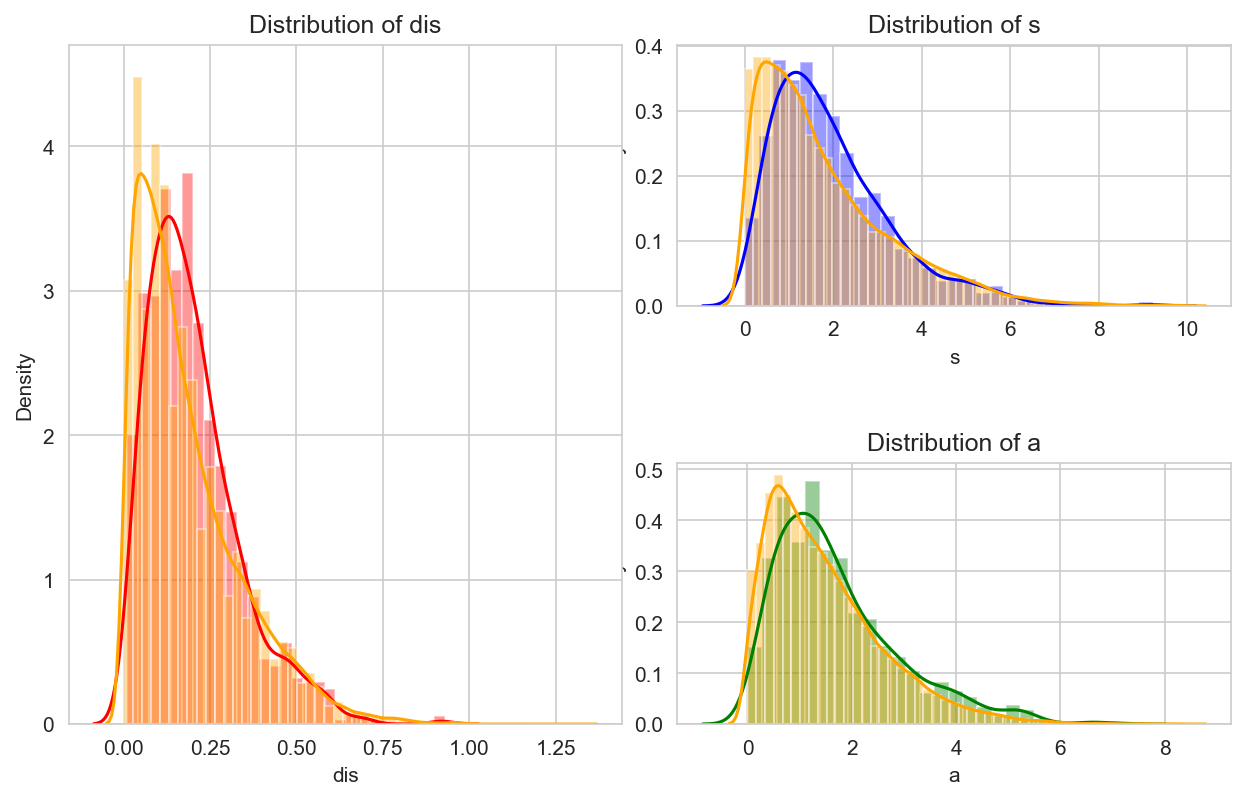

In [75]:
#Create figure and Axes. And set title.
fig, axes = plt.subplots(2, 2, figsize=(10,6), gridspec_kw=dict(wspace=0.1, hspace=0.6))

#...check layout, 
gs = axes[0, 1].get_gridspec()
axes[0, 0].remove()
axes[1, 0].remove()
#Add gridspec we got
axbig = fig.add_subplot(gs[:,0])

#how to remove the grid in the background?

#Add three plots.
sns.distplot(impactLabels["dis"], kde=True, rug=False, color="red", ax=axbig)
axbig.set_title("Distribution of dis", fontsize=12)

sns.distplot(impactLabels["s"], kde=True, color="blue", rug=False, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of s', fontsize=12)

sns.distplot(impactLabels["a"], kde=True, color="green", rug=False, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of a', fontsize=12)

sns.distplot(nonimpactLabels["dis"], kde=True, rug=False, color="orange", ax=axbig)
axbig.set_title("Distribution of dis", fontsize=12)

sns.distplot(nonimpactLabels["s"], kde=True, color="orange", rug=False, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of s', fontsize=12)

sns.distplot(nonimpactLabels["a"], kde=True, color="orange", rug=False, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of a', fontsize=12)

In [14]:
impactLabelsDATA = impactLabels.filter(['x','y','s','a','dis','o','dir','Home'], axis=1)
nonimpactLabelsDATA = nonimpactLabels.filter(['x','y','s','a','dis','o','dir','Home'], axis=1)
testingData = trainingLabels.filter(['x','y','s','a','dis','o','dir','Home','impact'], axis=1)

In [76]:
testingData

x      y     s     a   dis       o     dir  Home  impact  \
180      33.74  25.36  0.00  0.00  0.00  120.32   47.44     0     NaN   
181      35.32  26.25  0.00  0.00  0.00  272.45  317.96     1     NaN   
182      33.86  19.80  0.00  0.00  0.00   85.04  342.84     0     NaN   
183      32.98  21.35  0.00  0.00  0.00   67.37  294.24     0     NaN   
184      27.24  26.68  0.00  0.00  0.00   65.35   21.50     0     NaN   
...        ...    ...   ...   ...   ...     ...     ...   ...     ...   
974437  102.09  29.97  0.07  0.23  0.01   61.49  342.98     1     NaN   
974438  107.76  31.99  1.13  0.28  0.12  263.56  253.63     1     NaN   
974439  105.49  33.00  0.20  0.16  0.02  294.73  352.81     0     NaN   
974440  106.57  32.89  0.93  0.53  0.09  199.06  243.83     1     NaN   
974441  109.28  33.93  0.70  0.55  0.07  215.22  182.61     0     NaN   

        impactDet  
180             0  
181             0  
182             0  
183             0  
184             0  
...           ...  
974437          0  
974438          0  
974439          0  
974440          0  
974441          0  

[72519 rows x 10 columns]

In [25]:
impactDet=testingData['impact'].notnull()
impactDet=impactDet*1
testingData['impactDet'] = 0
testingData['impactDet'] = impactDet
testingData[(testingData['impactDet']==1)]

x      y     s     a   dis       o     dir  Home  impact  \
746      35.23  26.29  0.25  1.07  0.05  305.64  292.71     1     1.0   
754      34.30  26.79  0.14  0.79  0.03   91.68  136.27     0     1.0   
967      35.29  28.75  0.76  1.88  0.13  259.62  241.54     1     1.0   
969      33.85  28.19  0.55  1.16  0.05   63.73  110.69     0     1.0   
1007     34.00  25.57  0.76  1.47  0.12  106.81   50.09     0     1.0   
...        ...    ...   ...   ...   ...     ...     ...   ...     ...   
971866  105.62  33.82  0.80  2.16  0.09  281.04  266.62     1     1.0   
973095  103.42  34.13  0.32  0.88  0.04  156.68  295.03     0     1.0   
973110  102.94  34.11  1.19  1.41  0.16   55.92  276.61     0     1.0   
973112  103.83  33.87  1.65  1.22  0.19  289.05  272.02     0     1.0   
973799  103.73  33.95  0.24  0.61  0.03  218.44  277.10     1     1.0   

        impactDet  
746             1  
754             1  
967             1  
969             1  
1007            1  
...           ...  
971866          1  
973095          1  
973110          1  
973112          1  
973799          1  

[1182 rows x 10 columns]

In [119]:
randomTest1=testingData[((testingData["impactDet"] == 1))].sample(1000)
randomTest0=testingData[((testingData["impactDet"] == 0))].sample(1000)

In [120]:
frames = [randomTest1, randomTest0]
randomTest= pd.concat(frames)


In [121]:
randomTest

x      y     s     a   dis       o     dir  Home  impact  \
578134  61.54  30.46  3.47  0.54  0.35  345.56  349.46     1     1.0   
738032  92.59  25.81  0.92  1.82  0.10  104.00  305.02     1     1.0   
37966   59.32  32.54  2.60  1.18  0.30  269.03    5.36     1     1.0   
464020  63.21  25.63  0.86  1.38  0.11  225.98  190.13     1     1.0   
750770  69.79  36.79  2.12  1.78  0.19  217.00   18.08     1     1.0   
...       ...    ...   ...   ...   ...     ...     ...   ...     ...   
415517  33.89  27.91  0.75  0.66  0.11   96.36  102.24     1     NaN   
924601  58.74  27.47  0.99  2.21  0.09   72.63  310.73     0     NaN   
226640  74.98  14.92  1.29  0.54  0.15  311.71  309.07     1     NaN   
319281  29.55  22.45  1.39  2.90  0.13   94.19   56.16     1     NaN   
640457  85.08  25.89  6.10  2.02  0.64  165.47  177.44     1     NaN   

        impactDet  
578134          1  
738032          1  
37966           1  
464020          1  
750770          1  
...           ...  
415517          0  
924601          0  
226640          0  
319281          0  
640457          0  

[2000 rows x 10 columns]

In [122]:
import pandas as pd
import numpy as np

import sklearn as sk
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
labels = randomTest['impactDet']
#features = randomTest[['x','y','s','a','dis','o','dir','Home']]
features = randomTest[['a']]

d_train, d_test, l_train, l_test =  train_test_split(features, labels, test_size=0.3, random_state=0)


In [135]:
clf = svm.SVC(kernel='linear', C=1).fit(d_train, l_train)

In [136]:
clf.score(d_test, l_test)

0.51